In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import akshare as ak
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import datetime

In [3]:
from statsmodels.tsa.arima.model import ARIMA

In [4]:
from statsmodels.datasets import co2

# Load the CO2 dataset
dataset = co2.load_pandas()

# Access the data attribute to get the DataFrame
data = dataset.data

# Display the first few rows of the DataFrame
print(data.head())


              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


In [5]:
data.describe()

,co2
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


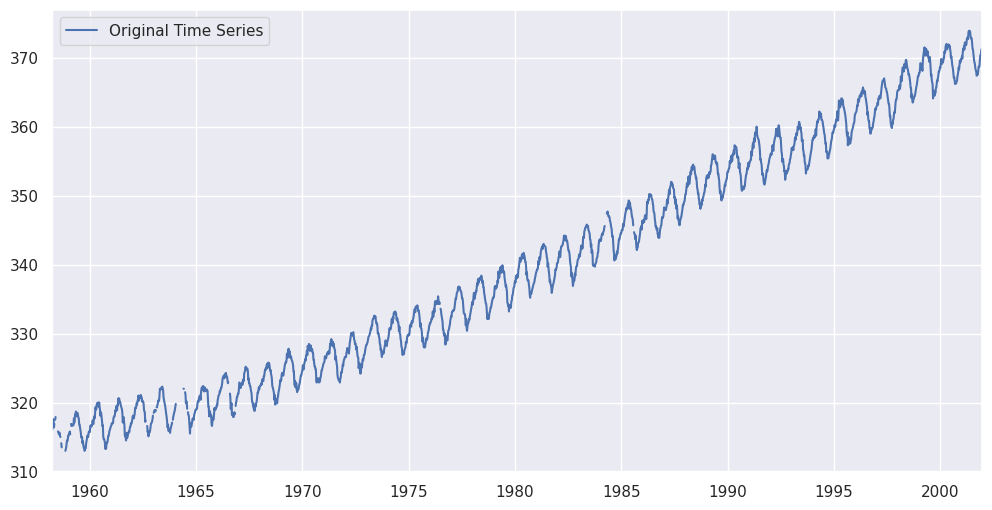

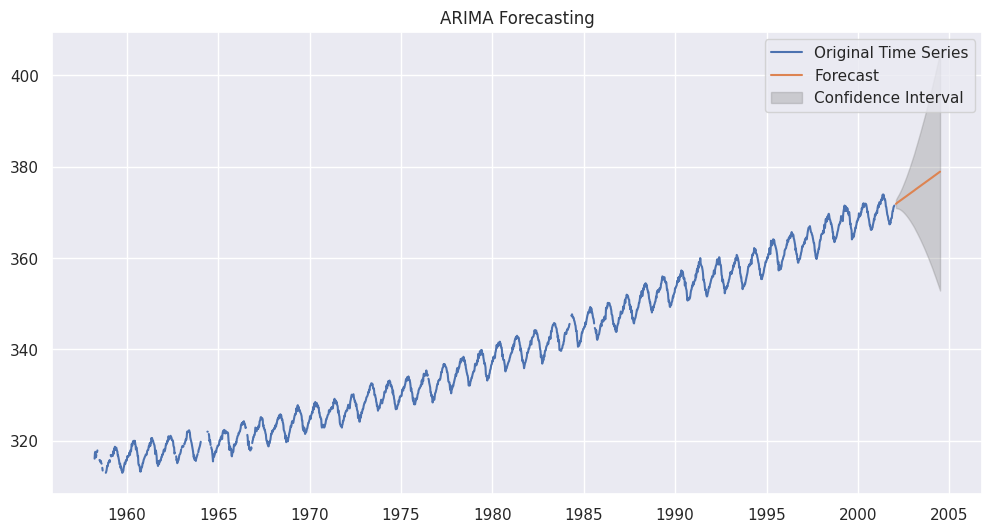

In [6]:
# Load the AirPassengers dataset
data = co2.load_pandas().data
ts = data['co2']

# Plot the time series data
ts.plot(figsize=(12, 6), label='Original Time Series')
plt.legend()
plt.show()

# Define ARIMA model
# For simplicity, assume p=2, d=2, q=2
p, d, q = 2, 2, 2
model = ARIMA(ts, order=(p, d, q))

# Fit the model
results = model.fit()

# Forecast future values
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Create a new date range for the forecast period
forecast_date_rng = pd.date_range(start=ts.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Time Series')
plt.plot(forecast_date_rng, forecast_values, label='Forecast')
plt.fill_between(forecast_date_rng, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()

In [7]:
exchange_rate_orign_2023df = ak.currency_boc_sina(symbol="加拿大元", start_date="20230101", end_date="20231115")

In [8]:
# Select data which I interested in and rename the columns of dataframe
exchange_rates_2023 = exchange_rate_orign_2023df[['日期','中行钞卖价/汇卖价', '中行汇买价']].rename(
        columns={
            "日期": "date", # type: datetime.dat
            "中行钞卖价/汇卖价": "bank_selling_exchange_rate", # The amount of Chinese currency that Bank of China willing to sell 100 CAD$ to you
            '中行汇买价':"bank_buying_exchange_rate" # The amount of Chinese currency that Bank of China is willing to buy 100 CAD$ from you
            }
        )
exchange_rates_2023.set_index(exchange_rates_2023['date'], inplace=True)
exchange_rates_2023

,date,bank_selling_exchange_rate,bank_buying_exchange_rate
date,,,
2023-01-02,2023-01-02,511.20,507.46
2023-01-03,2023-01-03,509.10,505.38
2023-01-04,2023-01-04,511.27,507.53
2023-01-05,2023-01-05,509.06,505.34
2023-01-06,2023-01-06,507.79,504.07
...,...,...,...
2023-11-09,2023-11-09,531.69,528.15
2023-11-10,2023-11-10,528.62,525.10
2023-11-13,2023-11-13,530.17,526.64


In [9]:
selling_rates_2023 = exchange_rates_2023['bank_buying_exchange_rate']
selling_rates_2023.index = pd.to_datetime(selling_rates_2023.index)
selling_rates_2023

date
2023-01-02    507.46
2023-01-03    505.38
2023-01-04    507.53
2023-01-05    505.34
2023-01-06    504.07
               ...  
2023-11-09    528.15
2023-11-10    525.10
2023-11-13    526.64
2023-11-14    526.79
2023-11-15    528.93
Name: bank_buying_exchange_rate, Length: 228, dtype: float64

In [10]:
selling_rates = selling_rates_2023.asfreq('BMS')

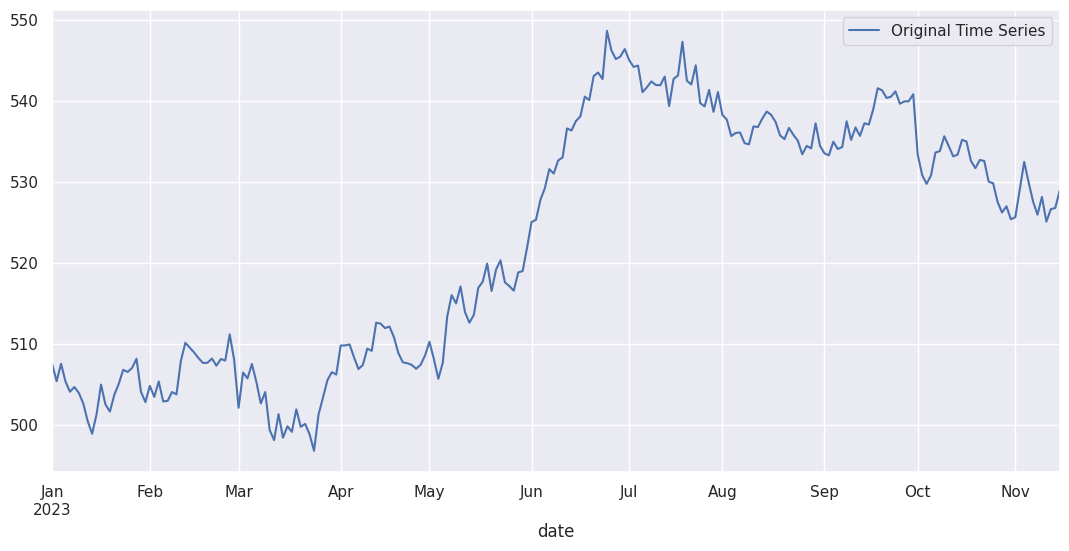

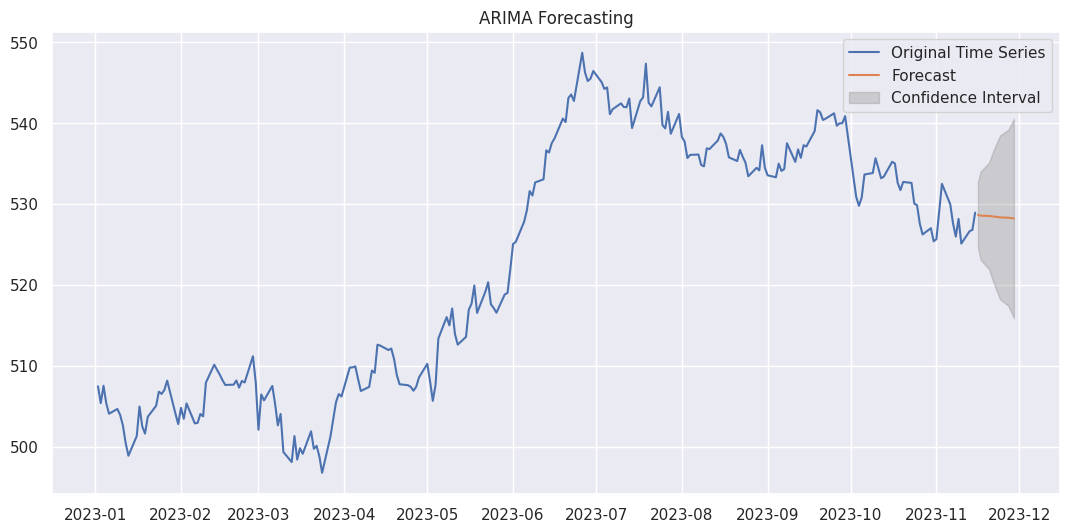

In [11]:
selling_rates = selling_rates_2023.asfreq('B')
# Plot the time series data
selling_rates.plot(figsize=(13, 6), label='Original Time Series')
plt.legend()
plt.show()

# Define ARIMA model

p, d, q = 2, 2, 1
model = ARIMA(selling_rates, order=(p, d, q))

# Fit the model
results = model.fit()

# Forecast future values
forecast_steps = 10
forecast = results.get_forecast(steps=forecast_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Create a new date range for the forecast period
forecast_date_rng = pd.date_range(start=selling_rates.index[-1], periods=forecast_steps + 1, freq='B')[1:]

# Plot the results
plt.figure(figsize=(13, 6))
plt.plot(selling_rates_2023, label='Original Time Series')
plt.plot(forecast_date_rng, forecast_values, label='Forecast')
plt.fill_between(forecast_date_rng, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()